# Final Project: Final Draft
## Delaney Curran
### 12/07/2022

The purpose of this project is to look at NBA data to determine what impact playing at home versus away has on a game. For this project I will be using the NBA API and kaggle to gather my data. There are so many factors and variables that go into a NBA game I want to see what is actually important and what drives a team to win.

In [2]:
import pandas as pd
import numpy as np
#from sklearn import linear_model
import requests
from nba_api.stats import endpoints
from matplotlib import pyplot as plt
from scipy import stats
import json
import seaborn as sns

In [3]:
from nba_api.stats.static import teams

nba_teams = teams.get_teams()
print('Number of teams fetched: {}'.format(len(nba_teams)))
nba_teams[:30]

Number of teams fetched: 30


[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966},
 {'id': 1610612742,
  'full_name': 'Dallas Mavericks',
  'abbreviation': 'DAL',
  'nickname': 'Mavericks',
  'city': 'Dallas',

In [4]:
from nba_api.stats.static import teams
nba_teams = teams.get_teams()

cavs = [team for team in nba_teams if team['abbreviation'] == 'CLE'][0]
cavs_id = cavs['id']

In [5]:
cavs

{'id': 1610612739,
 'full_name': 'Cleveland Cavaliers',
 'abbreviation': 'CLE',
 'nickname': 'Cavaliers',
 'city': 'Cleveland',
 'state': 'Ohio',
 'year_founded': 1970}

In [6]:
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.library.parameters import SeasonAll

cavs_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=cavs_id).get_data_frames()[0]

In [7]:
cavs_games.head()

SEASON_ID     TEAM_ID TEAM_ABBREVIATION            TEAM_NAME     GAME_ID  \
0     22022  1610612739               CLE  Cleveland Cavaliers  0022200421   
1     22022  1610612739               CLE  Cleveland Cavaliers  0022200406   
2     22022  1610612739               CLE  Cleveland Cavaliers  0022200390   
3     22022  1610612739               CLE  Cleveland Cavaliers  0022200381   
4     22022  1610612739               CLE  Cleveland Cavaliers  0022200360   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  REB  AST  \
0  2022-12-14    CLE @ DAL  W  239  105  ...   0.789     5    38   43   26   
1  2022-12-12    CLE @ SAS  L  241  111  ...   0.941    15    29   44   21   
2  2022-12-10  CLE vs. OKC  W  241  110  ...   0.692    12    36   48   25   
3  2022-12-09  CLE vs. SAC  L  241   95  ...   0.773     8    28   36   20   
4  2022-12-06  CLE vs. LAL  W  241  116  ...   0.765     9    35   44   25   

   STL  BLK  TOV  PF  PLUS_MINUS  
0    5    2    6  20        15.0  
1    7    7   15  13        -1.0  
2    6    4   11  14         8.0  
3    7    4   19  23       -11.0  
4   11    3    7  20        14.0  

[5 rows x 28 columns]

In [8]:
minuts = stats.describe(cavs_games['MIN'])
minuts

DescribeResult(nobs=3556, minmax=(46, 315), mean=240.54724409448818, variance=135.20311195277807, skewness=-5.301953263226811, kurtosis=92.40449757100124)

In [9]:
ast = stats.describe(cavs_games['AST'])
ast

DescribeResult(nobs=3556, minmax=(3, 45), mean=22.552024746906635, variance=33.45017592737617, skewness=0.3244058123504721, kurtosis=0.35891899895373536)

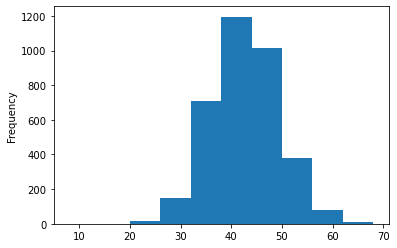

In [10]:
FT_PCT = cavs_games['REB'].plot.hist()
plt.show()

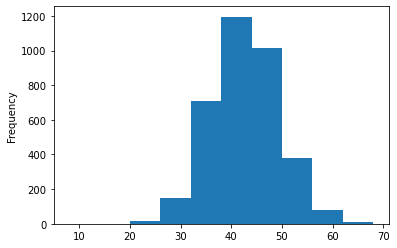

In [11]:
Reb = cavs_games['REB'].plot.hist()
plt.show()

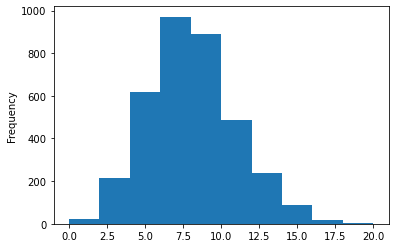

In [12]:
STL = cavs_games['STL'].plot.hist()
plt.show()

This is the data set that I will be working with for the final project. I am looking at Cleveland cavalier games from all seasons. I did some simple summaries so I can get the gist of the data set. One thing that I need to figure out is how to look at wins and losses because they are categorized as "W" and "L". I think that this data set is a good start for this project. I also used the help of https://github.com/swar/nba_api to understand how the NBA API works.

In [13]:
cavs_games1 = cavs_games.replace(to_replace = ["W", "L", "O", "T"], value = [0, 1, 0, 1])
cavs_games1

SEASON_ID     TEAM_ID TEAM_ABBREVIATION            TEAM_NAME     GAME_ID  \
0        22022  1610612739               CLE  Cleveland Cavaliers  0022200421   
1        22022  1610612739               CLE  Cleveland Cavaliers  0022200406   
2        22022  1610612739               CLE  Cleveland Cavaliers  0022200390   
3        22022  1610612739               CLE  Cleveland Cavaliers  0022200381   
4        22022  1610612739               CLE  Cleveland Cavaliers  0022200360   
...        ...         ...               ...                  ...         ...   
3551     21983  1610612739               CLE  Cleveland Cavaliers  0028300047   
3552     21983  1610612739               CLE  Cleveland Cavaliers  0028300031   
3553     21983  1610612739               CLE  Cleveland Cavaliers  0028300030   
3554     21983  1610612739               CLE  Cleveland Cavaliers  0028300019   
3555     21983  1610612739               CLE  Cleveland Cavaliers  0028300008   

       GAME_DATE      MATCHUP  WL  MIN  PTS  ...  FT_PCT  OREB  DREB  REB  \
0     2022-12-14    CLE @ DAL   0  239  105  ...   0.789     5    38   43   
1     2022-12-12    CLE @ SAS   1  241  111  ...   0.941    15    29   44   
2     2022-12-10  CLE vs. OKC   0  241  110  ...   0.692    12    36   48   
3     2022-12-09  CLE vs. SAC   1  241   95  ...   0.773     8    28   36   
4     2022-12-06  CLE vs. LAL   0  241  116  ...   0.765     9    35   44   
...          ...          ...  ..  ...  ...  ...     ...   ...   ...  ...   
3551  1983-11-04  CLE vs. DAL   0  240  105  ...   1.000    16    34   50   
3552  1983-11-02  CLE vs. HOU   0  240  103  ...   0.667    14    35   49   
3553  1983-11-01    CLE @ NJN   1  240  113  ...   0.647    11    20   31   
3554  1983-10-29  CLE vs. BOS   1  240   89  ...   0.810    16    28   44   
3555  1983-10-28  CLE vs. NYK   1  240  106  ...   0.650    18    17   35   

      AST  STL  BLK  TOV  PF  PLUS_MINUS  
0      26    5    2    6  20        15.0  
1      21    7    7   15  13        -1.0  
2      25    6    4   11  14         8.0  
3      20    7    4   19  23       -11.0  
4      25   11    3    7  20        14.0  
...   ...  ...  ...  ...  ..         ...  
3551   24    8    6   16  29         NaN  
3552   22    8    4   15  21         NaN  
3553   24    9    4   27  33         NaN  
3554   16    8    6   19  26         NaN  
3555   22    9    8   18  25         NaN  

[3556 rows x 28 columns]

Wins are coded as 0
Losses are coded as 1

In [14]:
if ('vs.' in cavs_games1['MATCHUP'][1]):
    print('2')
else:
    print('3')

    
test = [2 if ('vs.' in x) else 3 for x in cavs_games1['MATCHUP']]
test

3


[3,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 2,


Here I am coding home and away games as 2 and 3 so I am able to create graphs with them.

In [15]:
cavs_games1['HA'] = test
cavs_games1

SEASON_ID     TEAM_ID TEAM_ABBREVIATION            TEAM_NAME     GAME_ID  \
0        22022  1610612739               CLE  Cleveland Cavaliers  0022200421   
1        22022  1610612739               CLE  Cleveland Cavaliers  0022200406   
2        22022  1610612739               CLE  Cleveland Cavaliers  0022200390   
3        22022  1610612739               CLE  Cleveland Cavaliers  0022200381   
4        22022  1610612739               CLE  Cleveland Cavaliers  0022200360   
...        ...         ...               ...                  ...         ...   
3551     21983  1610612739               CLE  Cleveland Cavaliers  0028300047   
3552     21983  1610612739               CLE  Cleveland Cavaliers  0028300031   
3553     21983  1610612739               CLE  Cleveland Cavaliers  0028300030   
3554     21983  1610612739               CLE  Cleveland Cavaliers  0028300019   
3555     21983  1610612739               CLE  Cleveland Cavaliers  0028300008   

       GAME_DATE      MATCHUP  WL  MIN  PTS  ...  OREB  DREB  REB  AST  STL  \
0     2022-12-14    CLE @ DAL   0  239  105  ...     5    38   43   26    5   
1     2022-12-12    CLE @ SAS   1  241  111  ...    15    29   44   21    7   
2     2022-12-10  CLE vs. OKC   0  241  110  ...    12    36   48   25    6   
3     2022-12-09  CLE vs. SAC   1  241   95  ...     8    28   36   20    7   
4     2022-12-06  CLE vs. LAL   0  241  116  ...     9    35   44   25   11   
...          ...          ...  ..  ...  ...  ...   ...   ...  ...  ...  ...   
3551  1983-11-04  CLE vs. DAL   0  240  105  ...    16    34   50   24    8   
3552  1983-11-02  CLE vs. HOU   0  240  103  ...    14    35   49   22    8   
3553  1983-11-01    CLE @ NJN   1  240  113  ...    11    20   31   24    9   
3554  1983-10-29  CLE vs. BOS   1  240   89  ...    16    28   44   16    8   
3555  1983-10-28  CLE vs. NYK   1  240  106  ...    18    17   35   22    9   

      BLK  TOV  PF  PLUS_MINUS  HA  
0       2    6  20        15.0   3  
1       7   15  13        -1.0   3  
2       4   11  14         8.0   2  
3       4   19  23       -11.0   2  
4       3    7  20        14.0   2  
...   ...  ...  ..         ...  ..  
3551    6   16  29         NaN   2  
3552    4   15  21         NaN   2  
3553    4   27  33         NaN   3  
3554    6   19  26         NaN   2  
3555    8   18  25         NaN   2  

[3556 rows x 29 columns]

The structure of this data shows Everything that the Cavs could do in a game during their entire team career. I have to manipulate the data a little bit to show wins and losses and home and away as numbers. Most of the columns are the count of that event occurring occurring during the game. For example BLK stands for block and the number represents the frequency it occurred during that given game. This is true for most of the columns.

In [16]:
f = cavs_games1['WL'] == 1
f

0       False
1        True
2       False
3        True
4       False
        ...  
3551    False
3552    False
3553     True
3554     True
3555     True
Name: WL, Length: 3556, dtype: bool

In [17]:
cavs_games1.keys()

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'HA'],
      dtype='object')

In [18]:
count_WL = cavs_games1.groupby('WL').count()['GAME_ID']
count_WL

WL
0    1749
1    1807
Name: GAME_ID, dtype: int64

We can see the total number of wins as 0 and the total number of losses as 1.

In [19]:
count_HA = cavs_games1.groupby('HA').count()['GAME_ID']
count_HA

HA
2    1793
3    1763
Name: GAME_ID, dtype: int64

We can see the total number of home games as 2 and the total number of ways games as 3.

In [20]:
WLHA = pd.crosstab(cavs_games1.WL,cavs_games1.HA, margins = True)
WLHA

HA      2     3   All
WL                   
0    1084   665  1749
1     709  1098  1807
All  1793  1763  3556

Here I am creating a graph that is showing wins and losses at home and away games.

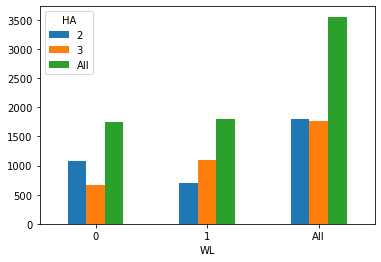

In [21]:
barplt_WL_HW = WLHA.plot.bar(rot=0)

As you can imagine the lowest category is wins away the next lowest category is losses at home. While away losses and home wins are fairly even.

I need to figure out how to illuminate O and T from the data

In [22]:
score = pd.crosstab(cavs_games1.PTS,[cavs_games1.HA, cavs_games1.WL])
score

HA   2     3   
WL   0  1  0  1
PTS            
10   1  0  0  0
57   0  0  0  1
59   0  0  0  1
61   0  0  0  1
62   0  1  0  1
..  .. .. .. ..
141  1  0  0  0
142  1  0  0  0
144  1  0  0  0
147  1  0  0  0
148  1  0  0  1

[87 rows x 4 columns]

In this chart I am showing wins and losses at home and away based on point value.

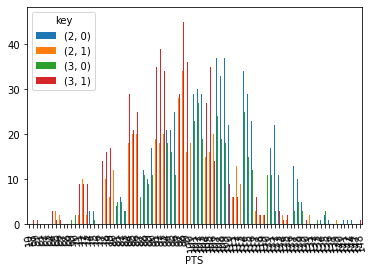

In [23]:
WL_HA_score = score.plot.bar(rot=100)
WL_HA_score.legend(title="key", loc= "upper left")

This is a graph that shows wins and losses at home and away games based on point value.

In [24]:
HA_score = pd.crosstab(cavs_games1.PTS,cavs_games1.HA)
HA_score

HA   2  3
PTS      
10   1  0
57   0  1
59   0  1
61   0  1
62   1  1
..  .. ..
141  1  0
142  1  0
144  1  0
147  1  0
148  1  1

[87 rows x 2 columns]

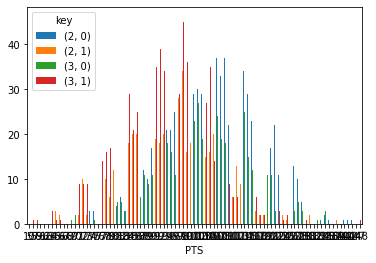

In [25]:
HA_score = score.plot.bar(rot=1)
HA_score.legend(title="key", loc= "upper left")

These graphs and chart show home and away games based on current value.

<AxesSubplot:xlabel='HA', ylabel='WL'>

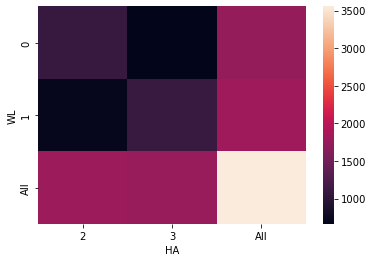

In [26]:
sns.heatmap(pd.crosstab(cavs_games1.WL,cavs_games1.HA, margins = True ))

Does heat map shows home and away games that are wins and losses. We can see that the colors are fairly similar for home and away games.

<AxesSubplot:xlabel='HA-WL', ylabel='PTS'>

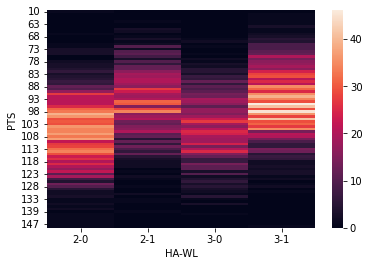

In [27]:
sns.heatmap(pd.crosstab(cavs_games1.PTS,[cavs_games1.HA, cavs_games1.WL]))

Does heat map shows home and away games, wins and losses based on points scored in the games.

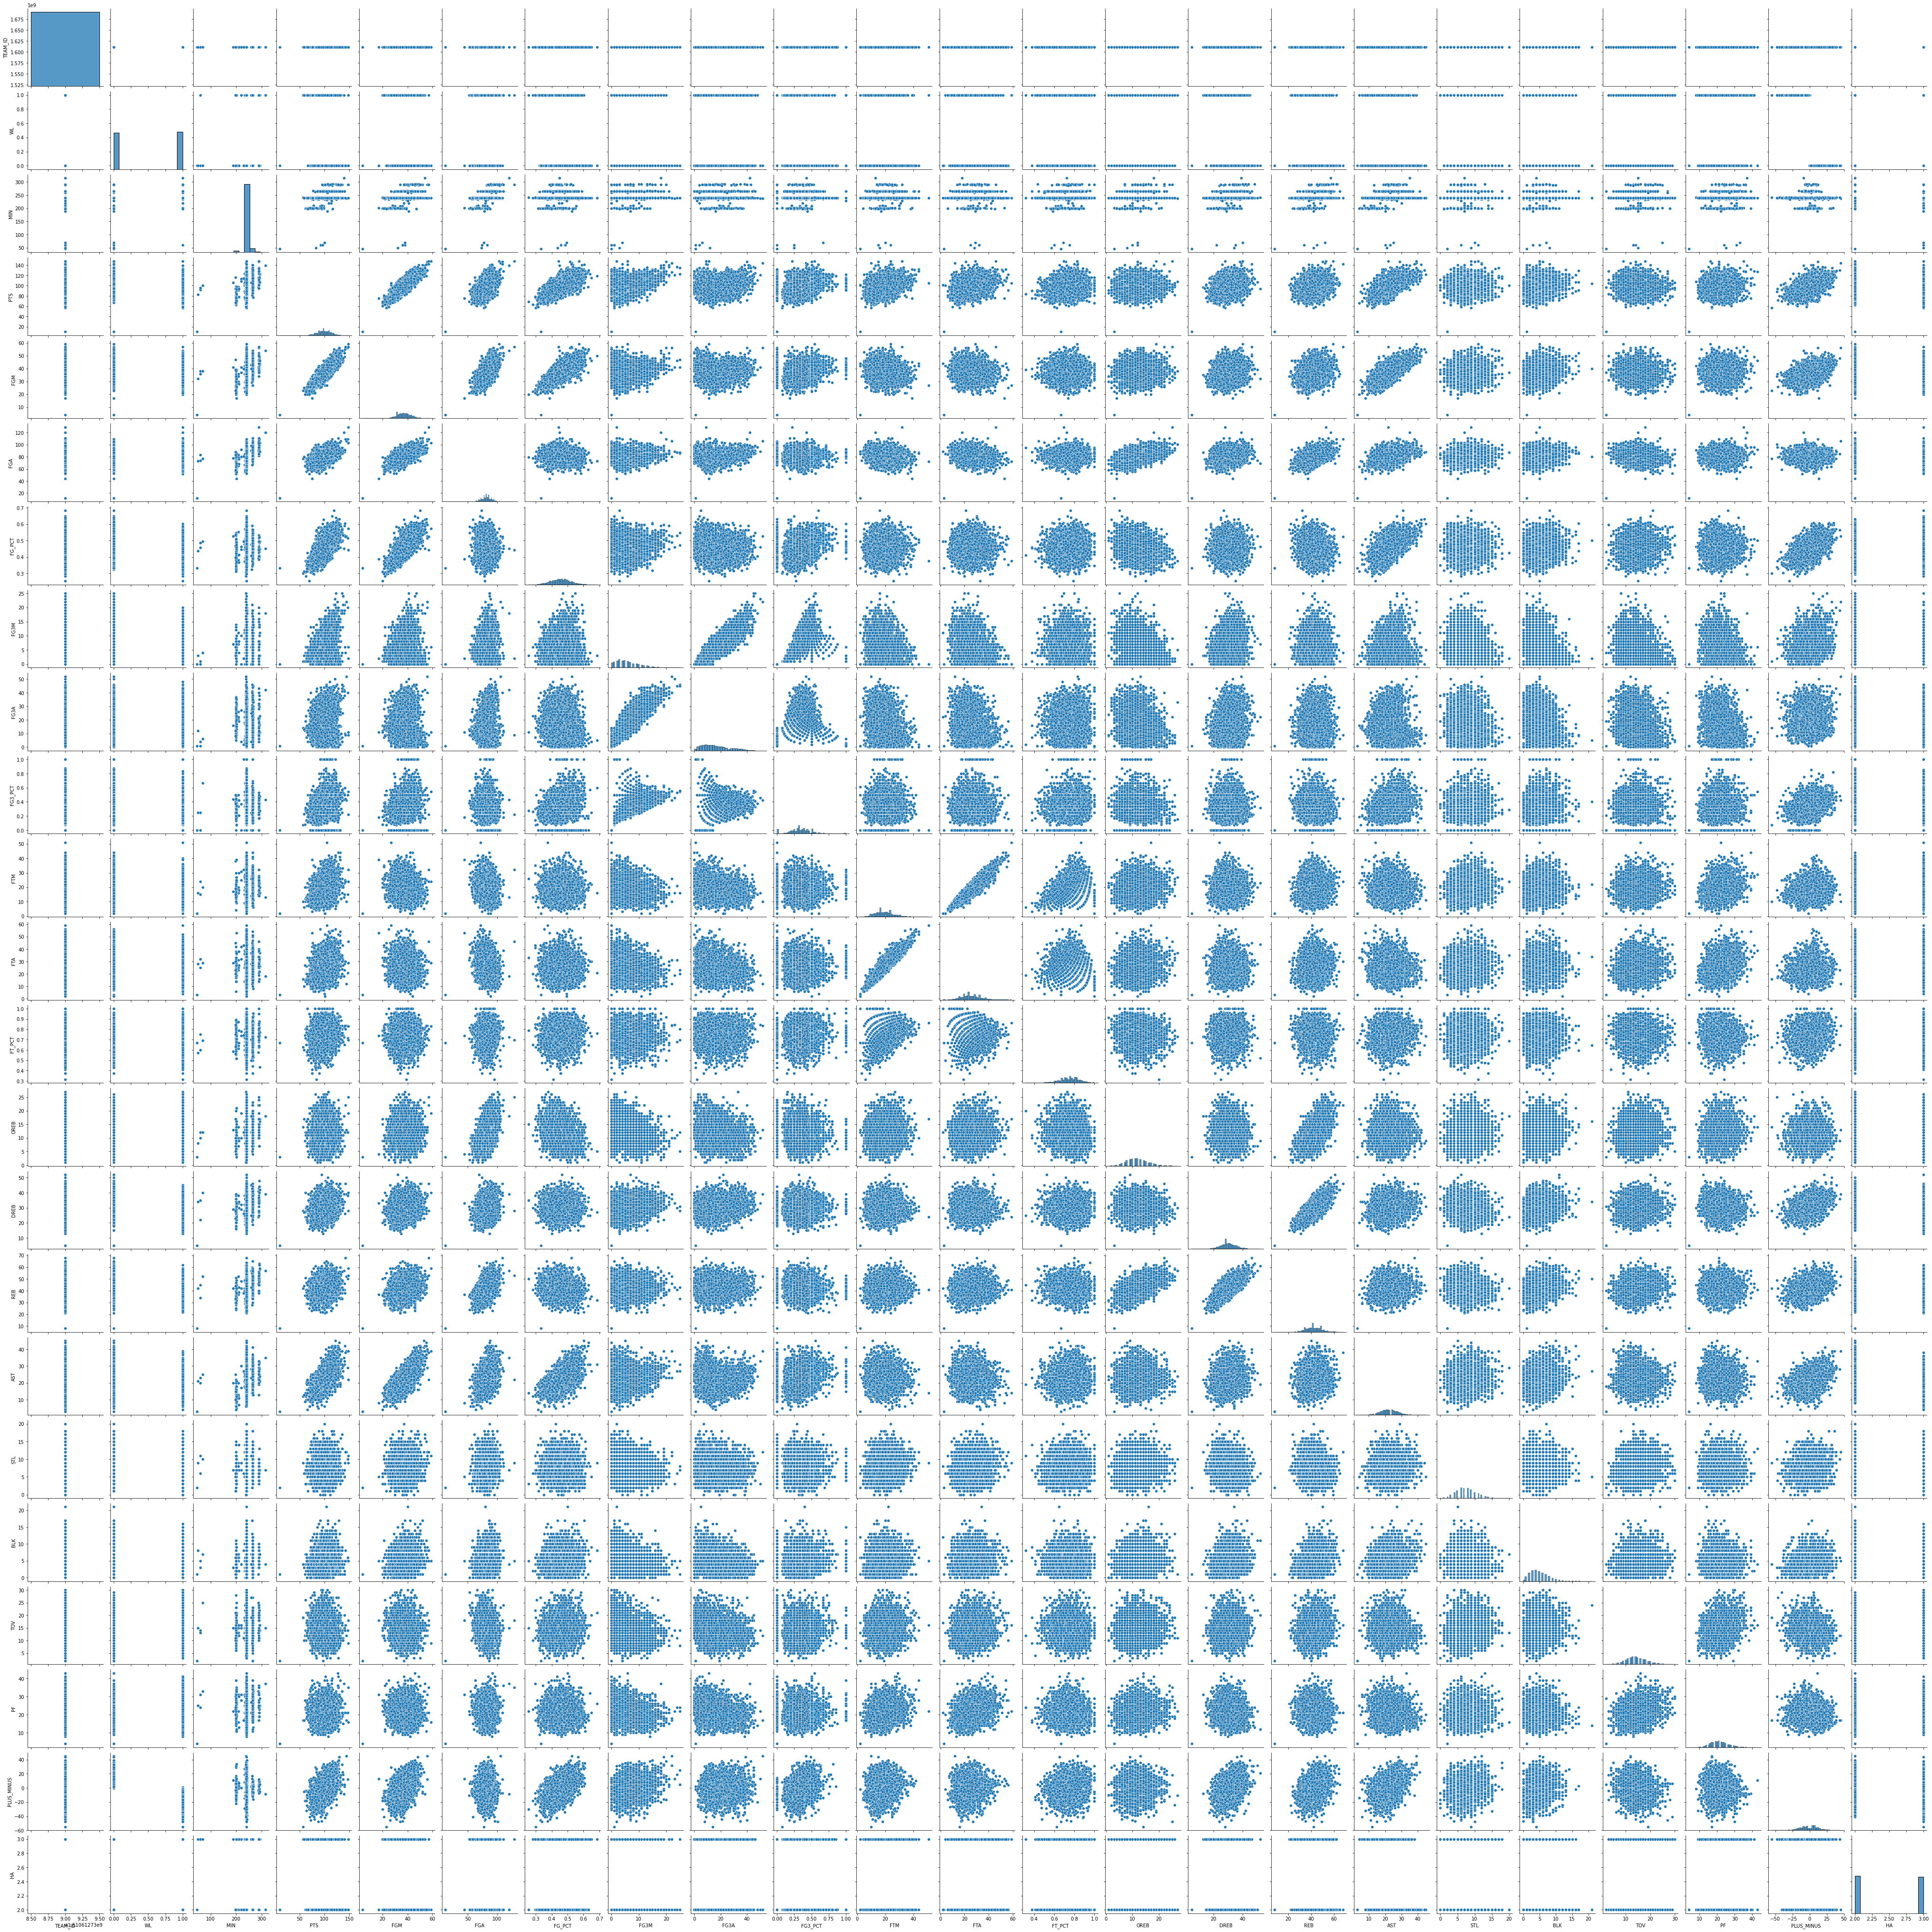

In [28]:
sns.pairplot(cavs_games1)

This graph is comparing every attribute to the other and we can gather a lot of information. Maybe even too much. I want to do something similar but with only a few variables.

<Figure size 432x288 with 0 Axes>

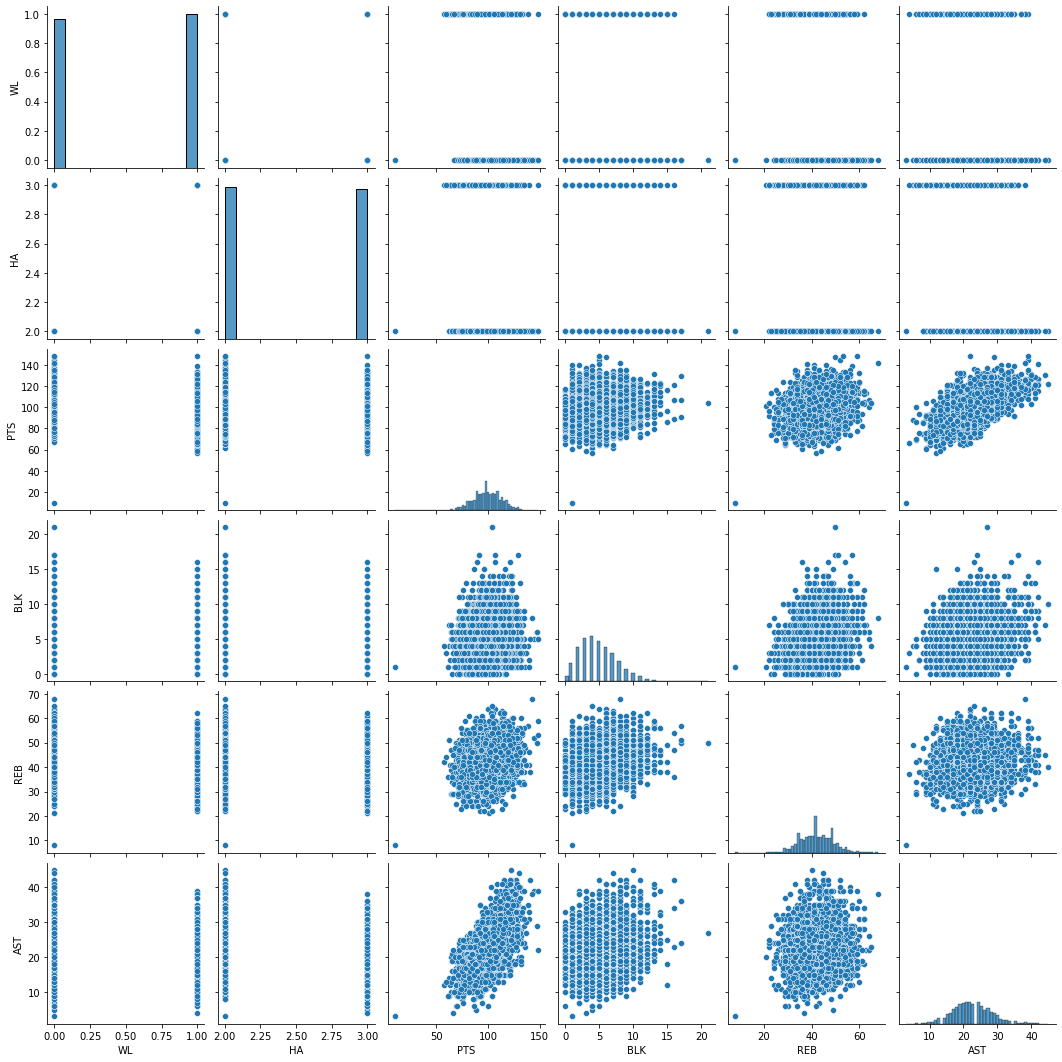

In [29]:
plt.figure()
sns.pairplot(cavs_games1, vars=['WL', 'HA', 'PTS', 'BLK', 'REB', 'AST'])
plt.show()

This graph compares important variables to each other.

<AxesSubplot:xlabel='WL', ylabel='PTS'>

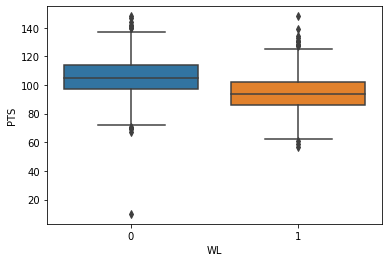

In [30]:
sns.boxplot(x ='WL', y ='PTS', data = cavs_games1)

<AxesSubplot:xlabel='HA', ylabel='PTS'>

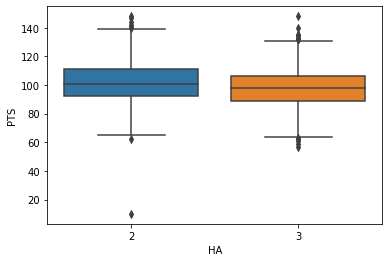

In [31]:
sns.boxplot(x ='HA', y ='PTS', data = cavs_games1)

In order to do the do the statistical analysis that I would like I'll added in new data. This data shows every NBA game from 2014 to 2022.

In [32]:
games = pd.read_csv("games.csv", header = 0, sep = ",")
games

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0        2022-03-12  22101005            Final    1610612748       1610612750   
1        2022-03-12  22101006            Final    1610612741       1610612739   
2        2022-03-12  22101007            Final    1610612759       1610612754   
3        2022-03-12  22101008            Final    1610612744       1610612749   
4        2022-03-12  22101009            Final    1610612743       1610612761   
...             ...       ...              ...           ...              ...   
25791    2014-10-06  11400007            Final    1610612737       1610612740   
25792    2014-10-06  11400004            Final    1610612741       1610612764   
25793    2014-10-06  11400005            Final    1610612747       1610612743   
25794    2014-10-05  11400002            Final    1610612761       1610612758   
25795    2014-10-04  11400001            Final    1610612748       1610612740   

       SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  \
0        2021    1610612748     104.0        0.398        0.760  ...   
1        2021    1610612741     101.0        0.443        0.933  ...   
2        2021    1610612759     108.0        0.412        0.813  ...   
3        2021    1610612744     122.0        0.484        0.933  ...   
4        2021    1610612743     115.0        0.551        0.750  ...   
...       ...           ...       ...          ...          ...  ...   
25791    2014    1610612737      93.0        0.419        0.821  ...   
25792    2014    1610612741      81.0        0.338        0.719  ...   
25793    2014    1610612747      98.0        0.448        0.682  ...   
25794    2014    1610612761      99.0        0.440        0.771  ...   
25795    2014    1610612748      86.0        0.431        0.679  ...   

       AST_home  REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  \
0          23.0      53.0    1610612750     113.0        0.422        0.875   
1          20.0      46.0    1610612739      91.0        0.419        0.824   
2          28.0      52.0    1610612754     119.0        0.489        1.000   
3          33.0      55.0    1610612749     109.0        0.413        0.696   
4          32.0      39.0    1610612761     127.0        0.471        0.760   
...         ...       ...           ...       ...          ...          ...   
25791      24.0      50.0    1610612740      87.0        0.366        0.643   
25792      18.0      40.0    1610612764      85.0        0.411        0.636   
25793      29.0      45.0    1610612743      95.0        0.387        0.659   
25794      21.0      30.0    1610612758      94.0        0.469        0.725   
25795      18.0      42.0    1610612740      98.0        0.462        0.706   

       FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  
0             0.357      21.0      46.0               0  
1             0.208      19.0      40.0               1  
2             0.389      23.0      47.0               0  
3             0.386      27.0      39.0               1  
4             0.387      28.0      50.0               0  
...             ...       ...       ...             ...  
25791         0.375      17.0      43.0               1  
25792         0.267      17.0      47.0               0  
25793         0.500      19.0      43.0               1  
25794         0.385      18.0      45.0               1  
25795         0.438      19.0      42.0               0  

[25796 rows x 21 columns]

In [33]:
games.keys()

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [34]:
games["PTS_DIF"] = games.PTS_home - games.PTS_away
games["FT_PCT_DIF"] = games.FT_PCT_home - games.FT_PCT_away
games["AST_DIF"] = games.AST_home - games.AST_away
games["REB_DIF"] = games.REB_home - games.REB_away
games

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0        2022-03-12  22101005            Final    1610612748       1610612750   
1        2022-03-12  22101006            Final    1610612741       1610612739   
2        2022-03-12  22101007            Final    1610612759       1610612754   
3        2022-03-12  22101008            Final    1610612744       1610612749   
4        2022-03-12  22101009            Final    1610612743       1610612761   
...             ...       ...              ...           ...              ...   
25791    2014-10-06  11400007            Final    1610612737       1610612740   
25792    2014-10-06  11400004            Final    1610612741       1610612764   
25793    2014-10-06  11400005            Final    1610612747       1610612743   
25794    2014-10-05  11400002            Final    1610612761       1610612758   
25795    2014-10-04  11400001            Final    1610612748       1610612740   

       SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  \
0        2021    1610612748     104.0        0.398        0.760  ...   
1        2021    1610612741     101.0        0.443        0.933  ...   
2        2021    1610612759     108.0        0.412        0.813  ...   
3        2021    1610612744     122.0        0.484        0.933  ...   
4        2021    1610612743     115.0        0.551        0.750  ...   
...       ...           ...       ...          ...          ...  ...   
25791    2014    1610612737      93.0        0.419        0.821  ...   
25792    2014    1610612741      81.0        0.338        0.719  ...   
25793    2014    1610612747      98.0        0.448        0.682  ...   
25794    2014    1610612761      99.0        0.440        0.771  ...   
25795    2014    1610612748      86.0        0.431        0.679  ...   

       FG_PCT_away  FT_PCT_away  FG3_PCT_away  AST_away  REB_away  \
0            0.422        0.875         0.357      21.0      46.0   
1            0.419        0.824         0.208      19.0      40.0   
2            0.489        1.000         0.389      23.0      47.0   
3            0.413        0.696         0.386      27.0      39.0   
4            0.471        0.760         0.387      28.0      50.0   
...            ...          ...           ...       ...       ...   
25791        0.366        0.643         0.375      17.0      43.0   
25792        0.411        0.636         0.267      17.0      47.0   
25793        0.387        0.659         0.500      19.0      43.0   
25794        0.469        0.725         0.385      18.0      45.0   
25795        0.462        0.706         0.438      19.0      42.0   

       HOME_TEAM_WINS  PTS_DIF  FT_PCT_DIF  AST_DIF  REB_DIF  
0                   0     -9.0      -0.115      2.0      7.0  
1                   1     10.0       0.109      1.0      6.0  
2                   0    -11.0      -0.187      5.0      5.0  
3                   1     13.0       0.237      6.0     16.0  
4                   0    -12.0      -0.010      4.0    -11.0  
...               ...      ...         ...      ...      ...  
25791               1      6.0       0.178      7.0      7.0  
25792               0     -4.0       0.083      1.0     -7.0  
25793               1      3.0       0.023     10.0      2.0  
25794               1      5.0       0.046      3.0    -15.0  
25795               0    -12.0      -0.027     -1.0      0.0  

[25796 rows x 25 columns]

Here I am adding variables that showed the difference between points free-throw percentage is assist and rebounds.

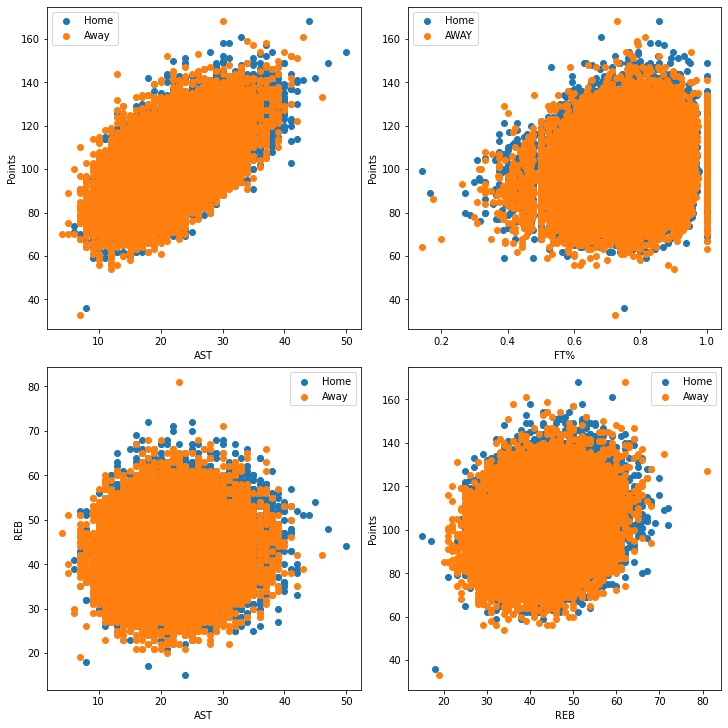

In [36]:
fig1, ax1 = plt.subplots(2,2, layout = "constrained")
fig1.set_figwidth(10)
fig1.set_figheight(10)
ax1[0,0].scatter(games.AST_home, games.PTS_home, label = 'Home')
ax1[0,0].scatter(games.AST_away,games.PTS_away,label="Away")
ax1[0,0].set_xlabel('AST')
ax1[0,0].set_ylabel('Points')

ax1[0,1].scatter(games.FT_PCT_home, games.PTS_home, label = 'Home')
ax1[0,1].scatter(games.FT_PCT_away, games.PTS_away, label = 'AWAY')
ax1[0,1].set_xlabel('FT%')
ax1[0,1].set_ylabel('Points')

ax1[1,0].scatter(games.AST_home, games.REB_home, label = 'Home')
ax1[1,0].scatter(games.AST_away, games.REB_away, label = 'Away')
ax1[1,0].set_xlabel('AST')
ax1[1,0].set_ylabel('REB')

ax1[1,1].scatter(games.REB_home, games.PTS_home, label = 'Home')
ax1[1,1].scatter(games.REB_away, games.PTS_away, label = 'Away')
ax1[1,1].set_xlabel('REB')
ax1[1,1].set_ylabel('Points')

ax1[0,0].legend()
ax1[0,1].legend()
ax1[1,0].legend()
ax1[1,1].legend()

plt.show()

Here I am  comparing my different attributes which are points, assist, free throw, percentages, and rebounds At home and away for every NBA team. As we can see Home games have a better average than away games.

In conclusion we can see that playing at home has a statistical significant impact on the outcome of the game and different factors in the game. Next steps for this project would be to see what kind of factors play into this outcome. Is it the number of attendance? Is it the travel time the away team has? 